In [19]:
from sklearn.cluster import AffinityPropagation as AffinityPropagation
import numpy as np
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
    
# ------- DIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
#df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})

df=pd.read_excel('C:\\Users\\artyom.zimin\\OneDrive - Accenture\\VTB 03-20\\SSC.xlsx', index_col=0)  
df



,First Object.Code,First Object.Name,First Object.VTB24ServiceCode,Наличие в проде,First Object.VTB24ServiceType,Second Object.Code,Second Object.Name,Second Object.VTB24ServiceCode,Наличие в проде2,Second Object.VTB24ServiceType,First Object.VTB24TargetSystem
Name,,,,,,,,,,,
CheckRecipientBS USE Проверка получателя на принадлежность черным спискам1,CheckRecipientBS,Проверка получателя на принадлежность черным с...,BS_ULBS422,225,BS,Проверка получателя на принадлежность черным с...,Проверка получателя на принадлежность черным с...,ULBS422,0,BS,<None>
InsuranceContractBS USE TSFinancialTransactionBS,InsuranceContractBS,Договор страхования,BS177,774,BS,TSFinancialTransactionBS,Транзакционный сервис,BS268,0,BS,<None>
PLMReportingTP USE BankEmployeeBS,PLMReportingTP,Формирование отчетности PLM,TP33,0,TP,BankEmployeeBS,Сотрудник Банка,BS182,102,BS,<None>
PLMReportingTP USE OrganizationUnitBS,PLMReportingTP,Формирование отчетности PLM,TP33,0,TP,OrganizationUnitBS,Организационное подразделение,BS181,1010,BS,<None>
FinancialTransactionBS2 USE TSFinancialTransactionBS,FinancialTransactionBS2,Финансовая транзакция2,BS66,517,BS,TSFinancialTransactionBS,Транзакционный сервис,BS268,0,BS,NaN
...,...,...,...,...,...,...,...,...,...,...,...
ComplexContractBS USE PersonAccountBS,ComplexContractBS,Договор комплексного обслуживания (ДКО),BS267,251,BS,PersonAccountBS,Счет ФЛ,BS179,1028,BS,NaN
ComplexContractBS USE RemoteBankingAccessBS,ComplexContractBS,Договор комплексного обслуживания (ДКО),BS267,251,BS,RemoteBankingAccessBS,Доступ к ДБО для клиентов ФЛ,BS112,1316,BS,NaN
ComplexContractBS USE NotificationServiceBS,ComplexContractBS,Договор комплексного обслуживания (ДКО),BS267,251,BS,NotificationServiceBS,"Услуга ""Оповещение""",BS67,906,BS,NaN


In [20]:
df = df[df['Наличие в проде2'] != 0]
df = df[df['Наличие в проде'] != 0]
df

,First Object.Code,First Object.Name,First Object.VTB24ServiceCode,Наличие в проде,First Object.VTB24ServiceType,Second Object.Code,Second Object.Name,Second Object.VTB24ServiceCode,Наличие в проде2,Second Object.VTB24ServiceType,First Object.VTB24TargetSystem
Name,,,,,,,,,,,
AutoIssueSIMCardTS USE OrganizationUnitBS,AutoIssueSIMCardTS,Автоматический заказ SIM карт PLM,TS144,44,TS,OrganizationUnitBS,Организационное подразделение,BS181,1010,BS,<None>
SIMOrderPlanGenerationTP USE OrganizationUnitBS,SIMOrderPlanGenerationTP,Формирование раскладки и передача в Октопус-Пр...,TP32,1413,TP,OrganizationUnitBS,Организационное подразделение,BS181,1010,BS,<None>
PLMProcessPartsTS USE GetCustomerPartyCrossRefsBatchBS,PLMProcessPartsTS,Части процессов PLM,TS64,1205,TS,GetCustomerPartyCrossRefsBatchBS,Пакетное получение кросс-сcылок клиента,BS158,655,BS,<None>
DepositBS2 USE PersonBS2,DepositBS2,Вклад2,BS4,424,BS,PersonBS2,Клиент ФЛ (версия 2),BS55,1061,BS,<None>
DepositBS2 USE PrepareFinancialTransactionBS2,DepositBS2,Вклад2,BS4,424,BS,PrepareFinancialTransactionBS2,Подготовка финансовой транзакции2,BS76,1211,BS,<None>
...,...,...,...,...,...,...,...,...,...,...,...
ComplexContractBS USE BankCardBS,ComplexContractBS,Договор комплексного обслуживания (ДКО),BS267,251,BS,BankCardBS,Банковская карта,BS161,69,BS,NaN
ComplexContractBS USE PersonAccountBS,ComplexContractBS,Договор комплексного обслуживания (ДКО),BS267,251,BS,PersonAccountBS,Счет ФЛ,BS179,1028,BS,NaN
ComplexContractBS USE RemoteBankingAccessBS,ComplexContractBS,Договор комплексного обслуживания (ДКО),BS267,251,BS,RemoteBankingAccessBS,Доступ к ДБО для клиентов ФЛ,BS112,1316,BS,NaN


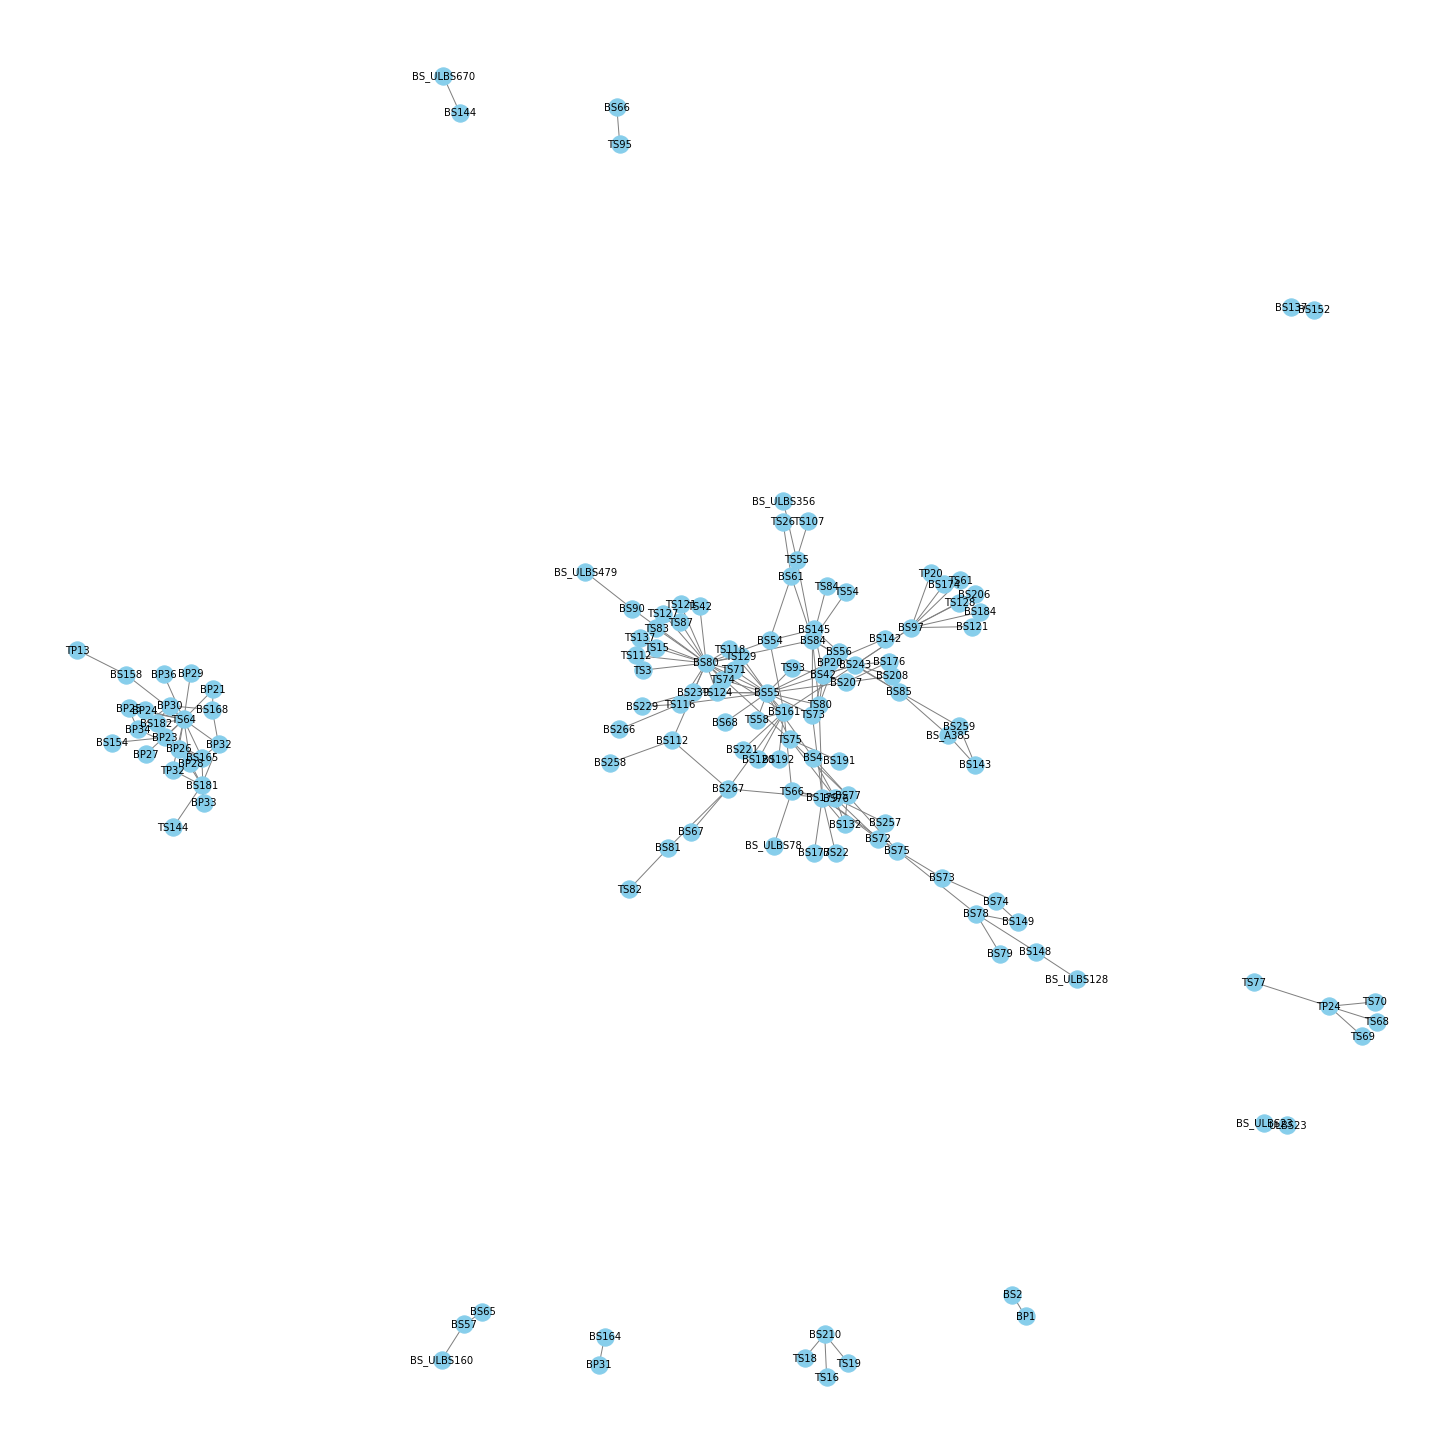

In [21]:
 
# Build your graph. Note that we use the DiGraph function to create the graph!
#G=nx.from_pandas_edgelist(df, 'First Object.VTB24ServiceCode', 'Second Object.VTB24ServiceCode', create_using=nx.DiGraph() )
G=nx.from_pandas_edgelist(df, 'First Object.VTB24ServiceCode', 'Second Object.VTB24ServiceCode', create_using=nx.Graph() ) 

# Make the graph
#gc=nx.coloring.greedy_color(G, strategy='largest_first')
plt.figure(3,figsize=(20,20)) 
#pos = nx.spring_layout(G, k=0.18,iterations=50)
#nx.draw(G,pos, with_labels=True, node_color="skyblue",node_size=300, arrows=True, font_size=10, font_color="black",edge_color="gray")
nx.draw(G, with_labels=True, node_color="skyblue",node_size=300, arrows=True, font_size=10, font_color="black",edge_color="gray")


plt.show()

1


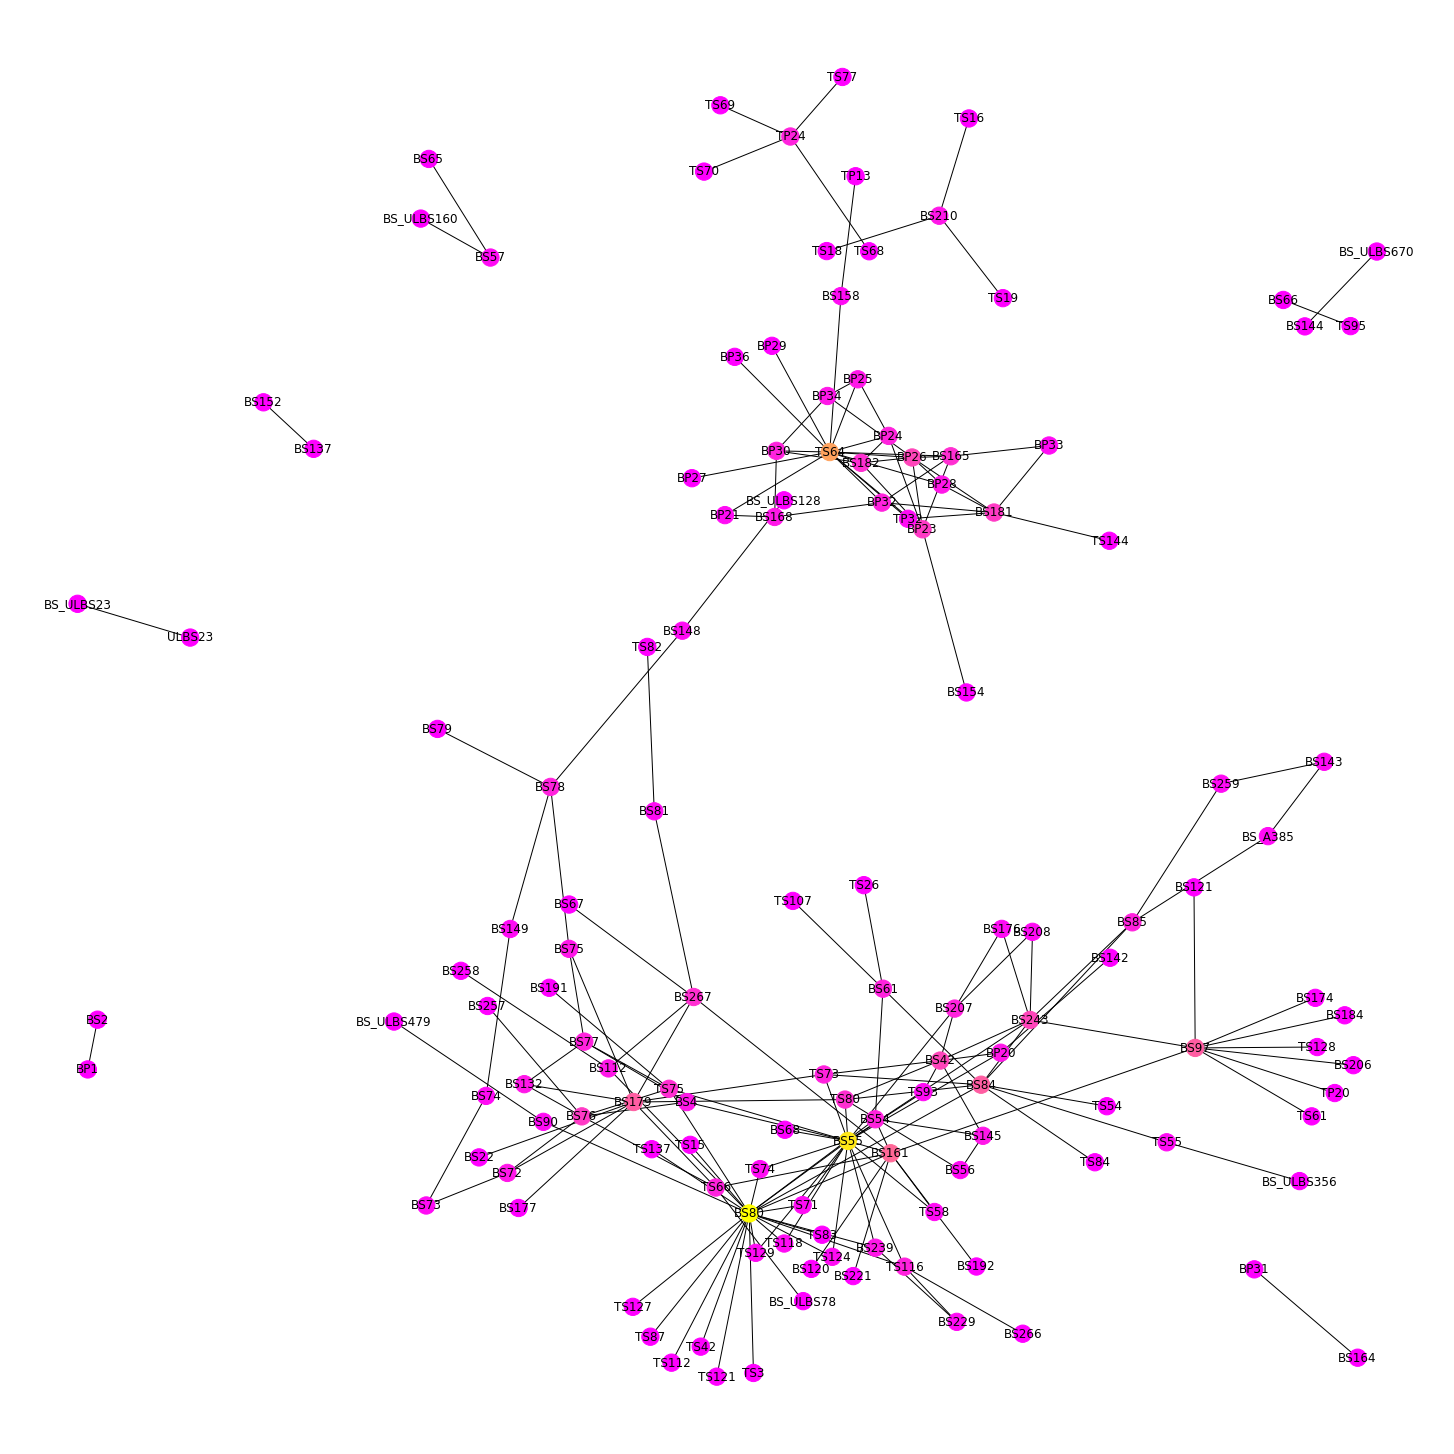

In [14]:
lst = dict(G.degree())
# Внутри квадратных скобок надо написать имя нужного сервиса, чтобы увидеть его число связей.
print(lst['TS144'])

values = [lst.get(node, 0.25) for node in G.nodes()]

plt.figure(3,figsize=(20,20)) 
pos = nx.spring_layout(G, k=0.18,iterations=50)

nx.draw(G, pos, cmap=plt.get_cmap('spring'), node_color=values, with_labels=True, font_color='black')

plt.show()

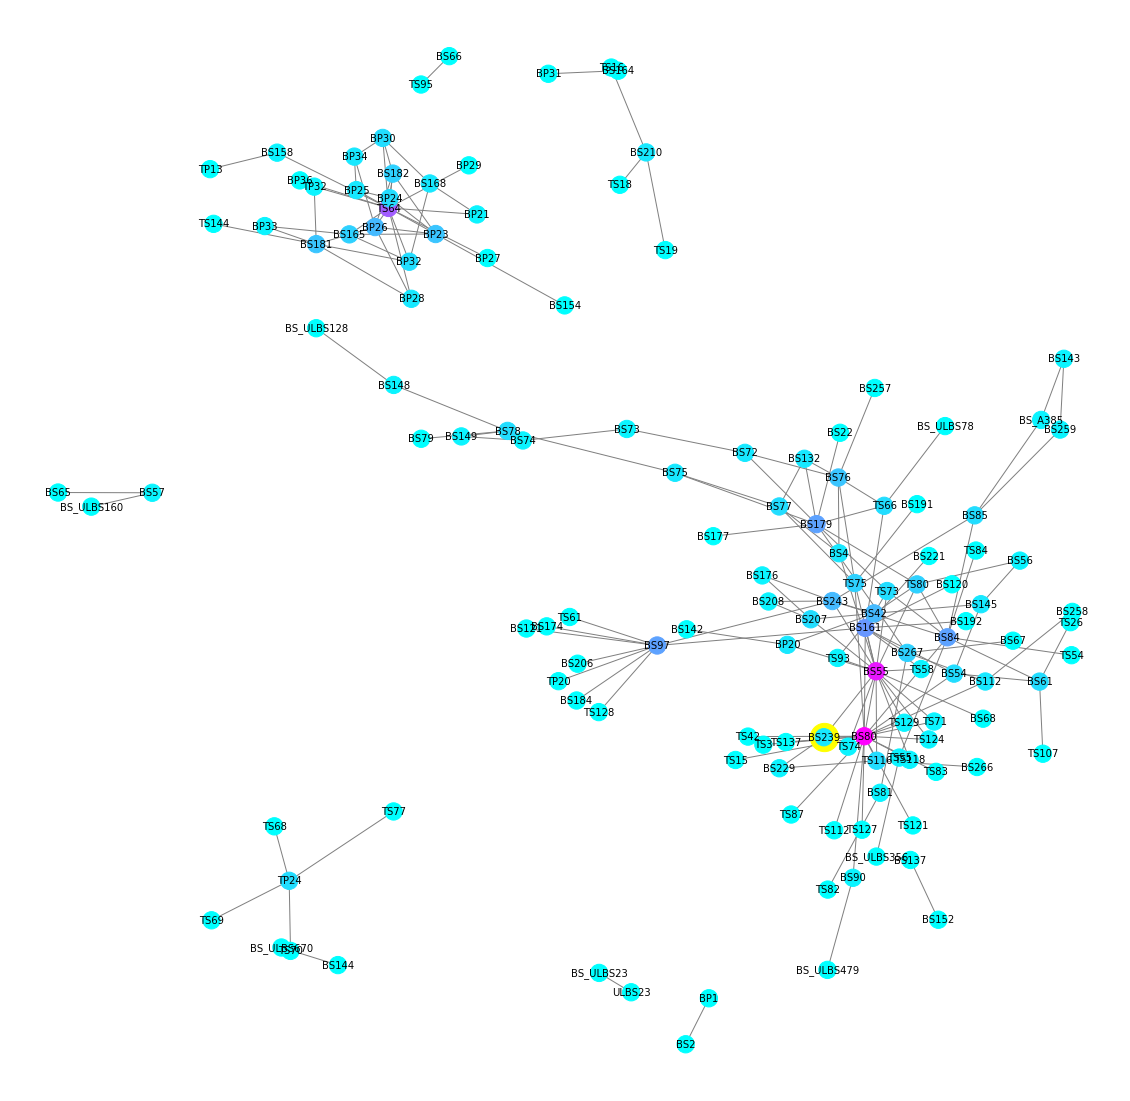

In [28]:
node_to_find="BS239"
plt.figure(4,figsize=(20,20)) 
pos = nx.spring_layout(G, k=0.9,iterations=280)


nx.draw_networkx(G, pos, nodelist=[node_to_find], node_size=800, node_color='yellow',edge_color="white",with_labels=False)
nx.draw(G, pos, cmap=plt.get_cmap('cool'), node_color=values, with_labels=True, arrows=True, font_color='black',edge_color="gray",edge_width=0.01, font_size=10)

plt.show()

In [82]:
d = list(nx.connected_component_subgraphs(G))
len(d)

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

In [ ]:
for i in d:
    plt.figure(3,figsize=(20,20)) 
    nx.draw(i,pos, with_labels=True, node_color="skyblue",node_size=2000, arrows=True, font_size=22, font_color="black",edge_color="gray")
    plt.show()


In [ ]:
typeof(G)

In [ ]:
G.nodes